In [ ]:
# Tugas Kecil 2: Eksplorasi scikit-learn pada Jupyter Notebook
## IF3170 Inteligensi Buatan
## Anggota Kelompok:
## 13515002 - Wenny Yustalim (K-02)
## 13515004 - Jordhy Fernando (K-01)

# Membaca Dataset Standar iris dan Dataset play-tennis

## Membaca Dataset iris

In [54]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dataset dicetak sebagai pembuktian 
# (menggunakan library pandas agar tampilan lebih rapi)
print(pd.DataFrame(data= np.c_[X, y],
                     columns= iris.feature_names + ['target']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

## Membaca Dataset play-tennis

In [55]:
play_tennis = pd.read_csv("play-tennis.csv")

# Dataset dicetak sebagai pembuktian
print ("Dataset Play Tennis")
print(play_tennis)

Dataset Play Tennis
     outlook temperature humidity   wind playtennis
0      sunny         hot     high  False         no
1      sunny         hot     high   True         no
2   overcast         hot     high  False        yes
3       rain        mild     high  False        yes
4       rain        cool   normal  False        yes
5       rain        cool   normal   True         no
6   overcast        cool   normal   True        yes
7      sunny        mild     high  False         no
8      sunny        cool   normal  False        yes
9       rain        mild   normal  False        yes
10     sunny        mild   normal   True        yes
11  overcast        mild     high   True        yes
12  overcast         hot   normal  False        yes
13      rain        mild     high   True         no


# Pembelajaran Dataset iris dengan Skema *Full Training*

## *Naive Bayes (Gaussian Naive Bayes)*

Pada Gaussian Naive Bayes (*Naive Bayes* untuk data kontinu), model yang digunakan adalah probablitas setiap kelas serta rata-rata dan variansi setiap fitur per kelas.

In [56]:
from sklearn.naive_bayes import GaussianNB

clfNB = GaussianNB()
clfNB.fit(X, y)

# Menampilkan model
print("Model:")
print("1. Probabilitas setiap kelas:")
print(clfNB.class_prior_)
print()
print("2. Rata-rata setiap fitur per kelas:")
print(clfNB.theta_)
print()
print("3. Variansi setiap fitur per kelas:")
print(clfNB.sigma_)

Model:
Probability of each class
[ 0.33333333  0.33333333  0.33333333]

Mean of each feature per class
[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]

Variance of each feature per class
[[ 0.121764  0.142276  0.029504  0.011264]
 [ 0.261104  0.0965    0.2164    0.038324]
 [ 0.396256  0.101924  0.298496  0.073924]]


## *Decision Tree*

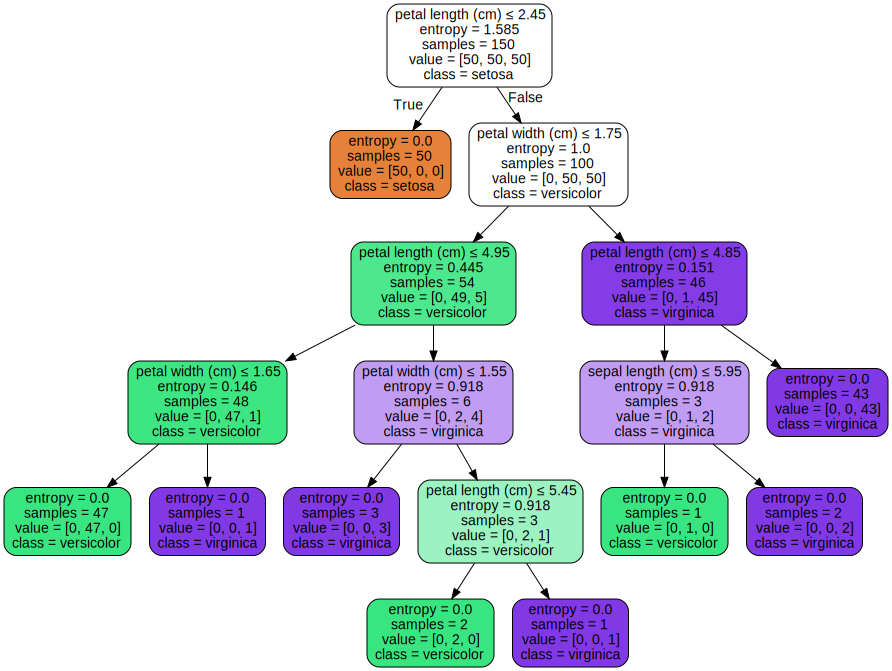

In [57]:
from sklearn import tree
import graphviz

clfDT = tree.DecisionTreeClassifier(criterion="entropy")
clfDT.fit(X, y)

# Menampilkan model
dot_data = tree.export_graphviz(clfDT, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## *k-Nearest Neighbors (kNN)*

*Classifier k-Nearest Neighbors (kNN)* tidak membentuk model. *Classifier* ini hanya menyimpan *instances* dari *training data*. Klasifikasi dilakukan dengan melakukan *majority vote* dari k tetangga terdekat sebuah *query point*: sebuah *query point* di-*assign* dengan kelas data yang representasinya paling banyak pada k-tetangga terdekat.

In [58]:
from sklearn import neighbors

k = 15
clfkNN = neighbors.KNeighborsClassifier(k, weights='uniform')
clfkNN.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

## *Neural Network MLP (Multi Layer Perceptron)*

In [59]:
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(solver='lbfgs',
                hidden_layer_sizes=(5, 2))
clfMLP.fit(X, y)

# Menampilkan model
print("Model:")

# Elemen ke i pada list merepresentasikan weight matrix untuk layer ke-i
print("1. Weight Matrices:")
print(clfMLP.coefs_)
print()

# Elemen ke i pada list merepresentasikan bias vector untuk layer ke-(i + 1)
print("2. Bias Vectors:")
print(clfMLP.intercepts_)

Model:
Weight Matrices
[array([[ 1.01258679,  0.82234479, -1.16060009,  0.8495199 , -1.27568892],
       [ 0.8277126 ,  3.02830012, -0.8551471 ,  0.46644526, -2.83843377],
       [-0.91368966, -4.28831685, -1.07589987,  0.23117108,  4.64818165],
       [ 0.57607351, -2.25787079, -0.14061677, -0.4353243 ,  5.02956417]]), array([[ -0.6937543 ,  -2.44807347,   1.58958989],
       [ 11.12620148,  -3.52589795,  -7.55923332],
       [ -0.24601622,   0.1056076 ,  -0.34028778],
       [ -0.57123027,   2.14710543,  -0.91744721],
       [ -6.11849545,   1.54074434,   4.35546369]])]

Bias Vectors
[array([-4.57224276,  0.17702705,  0.22987922,  1.88271003, -2.27752671]), array([ 0.74905558,  5.52469208, -6.09559228])]


# Pembelajaran Dataset iris dengan Skema *Split Train* 90% dan *Test* 10% dan Menampilkan Kinerja Serta *Confusion Matrix*-nya

## Membagi Dataset

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1)

## *Naive Bayes*

In [89]:
from sklearn import metrics

clfNB.fit(X_train, y_train)
y_pred = clfNB.predict(X_test)

# Menampilkan kinerja dan confusion matrix
print("Kinerja:")
print("1. Accuracy:", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Kinerja:
1. Accuracy: 100.0%

2. Precision setiap kelas:
setosa: 100.0%
versicolor: 100.0%
virginica: 100.0%

3. Recall setiap kelas:
setosa: 100.0%
versicolor: 100.0%
virginica: 100.0%

Confusion Matrix:
[[5 0 0]
 [0 7 0]
 [0 0 3]]


## *Decision Tree*

In [78]:
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

# Menampilkan kinerja dan confusion matrix
print("Kinerja:")
print("1. Accuracy:", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Kinerja:
1. Accuracy: 100.0%
2. Precision setiap kelas dalam persen:
[ 100.  100.  100.]
3. Recall setiap kelas dalam persen:
[ 100.  100.  100.]

Confusion Matrix:
[[5 0 0]
 [0 7 0]
 [0 0 3]]


## *k-Nearest Neighbors (kNN)*

In [79]:
clfkNN.fit(X_train, y_train)
y_pred = clfkNN.predict(X_test)

# Menampilkan kinerja dan confusion matrix
print("Kinerja:")
print("1. Accuracy:", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Kinerja:
1. Accuracy: 100.0%
2. Precision setiap kelas dalam persen:
[ 100.  100.  100.]
3. Recall setiap kelas dalam persen:
[ 100.  100.  100.]

Confusion Matrix:
[[5 0 0]
 [0 7 0]
 [0 0 3]]


## *Neural Network MLP (Multi Layer Perceptron)*

In [80]:
clfMLP.fit(X_train, y_train)
y_pred = clfMLP.predict(X_test)

# Menampilkan kinerja dan confusion matrix
print("Kinerja:")
print("1. Accuracy:", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall setiap kelas:")
for i in range(3):
    print(iris.target_names[i] + ": " + str(precision[i]) + "%")
print()

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Kinerja:
1. Accuracy: 100.0%
2. Precision setiap kelas dalam persen:
[ 100.  100.  100.]
3. Recall setiap kelas dalam persen:
[ 100.  100.  100.]

Confusion Matrix:
[[5 0 0]
 [0 7 0]
 [0 0 3]]


# Pembelajaran Dataset iris dengan Skema *10-fold cross validation* dan Menampilkan Kinerjanya

## *Naive Bayes*

In [91]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clfNB, X, y, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 0.933333333333
Fold-2: 0.933333333333
Fold-3: 1.0
Fold-4: 0.933333333333
Fold-5: 0.933333333333
Fold-6: 0.933333333333
Fold-7: 0.866666666667
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.953333333333


## *Decision Tree*

In [92]:
score = cross_val_score(clfDT, X, y, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 1.0
Fold-2: 0.933333333333
Fold-3: 1.0
Fold-4: 0.933333333333
Fold-5: 0.933333333333
Fold-6: 0.866666666667
Fold-7: 0.933333333333
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.96


## *k-Nearest Neighbors (kNN)*

In [93]:
score = cross_val_score(clfkNN, X, y, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 0.933333333333
Fold-2: 0.933333333333
Fold-3: 1.0
Fold-4: 1.0
Fold-5: 1.0
Fold-6: 0.933333333333
Fold-7: 0.933333333333
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.973333333333


## *Neural Network MLP (Multi Layer Perceptron)*

In [94]:
score = cross_val_score(clfMLP, X, y, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 1.0
Fold-2: 1.0
Fold-3: 1.0
Fold-4: 1.0
Fold-5: 0.933333333333
Fold-6: 1.0
Fold-7: 0.8
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 0.333333333333

Rata-rata: 0.906666666667


# Menyimpan Model/Hipotesis Hasil Pembelajaran ke Sebuah File Eksternal

In [ ]:
from sklearn.externals import joblib

joblib.dump(clfNB, 'iris_NB.mdl')
joblib.dump(clfDT, 'iris_DT.mdl')
joblib.dump(clfkNN, 'iris_kNN.mdl')
joblib.dump(clfMLP, 'iris_MLP.mdl')

# Membaca Model/Hipotesis dari File Eksternal

In [6]:
clfNB = joblib.load('iris_NB.mdl')
clfDT = joblib.load('iris_DT.mdl')
clfkNN = joblib.load('iris_kNN.mdl')
clfMLP = joblib.load('iris_MLP.mdl')

# Membuat *Instance* Baru dengan Memberi Nilai untuk Setiap Atribut

In [98]:
unknown_iris = [4.8, 3, 2, 0.1]
unknown_iris = np.array([unknown_iris])
                
print("Instance baru:")
for i in range(4):
    print(iris.feature_names[i] + ":", unknown_iris[0][i])

Instance baru:
sepal length (cm): 4.8
sepal width (cm): 3.0
petal length (cm): 2.0
petal width (cm): 0.1


# Klasifikasi dengan Memanfaatkan Model/Hipotesis

## *Naive Bayes*

In [109]:
print(iris.target_names[clfNB.predict(unknown_iris)][0])

setosa


## *Decision Tree*

In [7]:
print(iris.target_names[clfDT.predict(unknown_iris)][0])

## *k-Nearest Neighbor (kNN)*

In [ ]:
print(iris.target_names[clfkNN.predict(unknown_iris)][0])

## *Neural Network MLP (Multi Layer Perceptron)*

In [108]:
print(iris.target_names[clfMLP.predict(unknown_iris)][0])

['setosa']
